In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

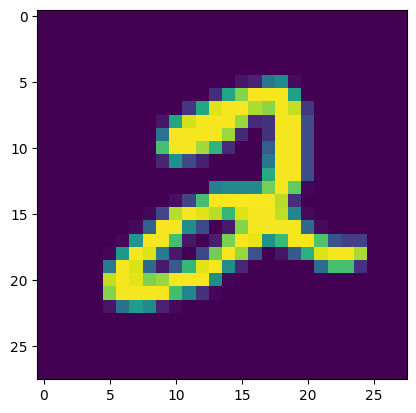

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0772 - accuracy: 0.9756 - val_loss: 0.0993 - val_accuracy: 0.9708
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0878 - val_accuracy: 0.9740
Epoch 3/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0936 - val_accuracy: 0.9731
Epoch 4/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.1148 - val_accuracy: 0.9676
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0311 - accuracy: 0.9893 - val_loss: 0.1019 - val_accuracy: 0.9727
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.1010 - val_accuracy: 0.9738
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.1048 - val_accur

In [20]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.976

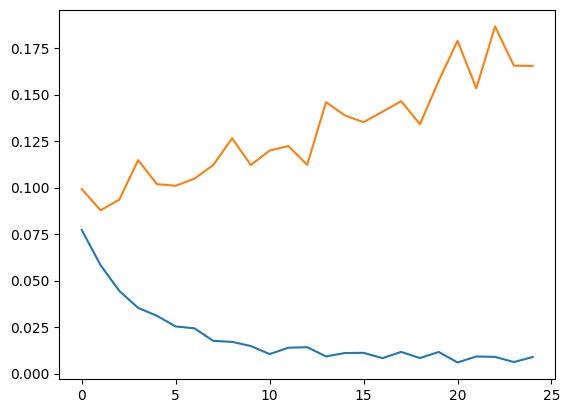

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

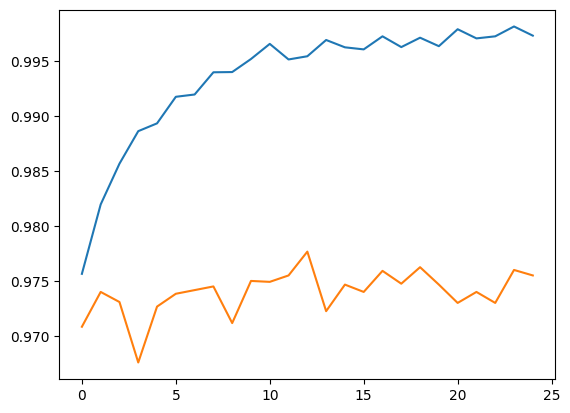

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

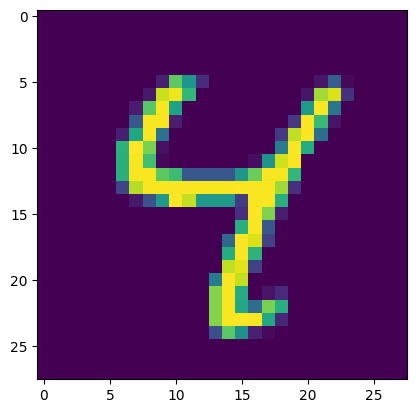

In [27]:
plt.imshow(X_test[6])

In [28]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([4])